# Максим Ляра GPN Cup

## Импорт библиотек и данных

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [2]:
df = pd.read_parquet("transaction_df.parquet")

In [3]:
df.head()

,product,price,amount,place,datetime
0,Целебные травы,3.9,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.9,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.9,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.9,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.9,1.367161,Анор Лондо,2216-01-02 05:33:00


## EDA и предобработка

In [4]:
df['datetime'].max() - df['datetime'].min()

Timedelta('999 days 23:49:00')

In [5]:
df['datetime'].max()

Timestamp('2218-09-27 23:57:00')

In [6]:
df['datetime'].min()

Timestamp('2216-01-02 00:08:00')

In [7]:
print('Количество строк:', df.size)
print('______________')
print(df.isna().sum())

Количество строк: 4375180
______________
product       0
price         0
amount        0
place       432
datetime      0
dtype: int64


<Axes: >

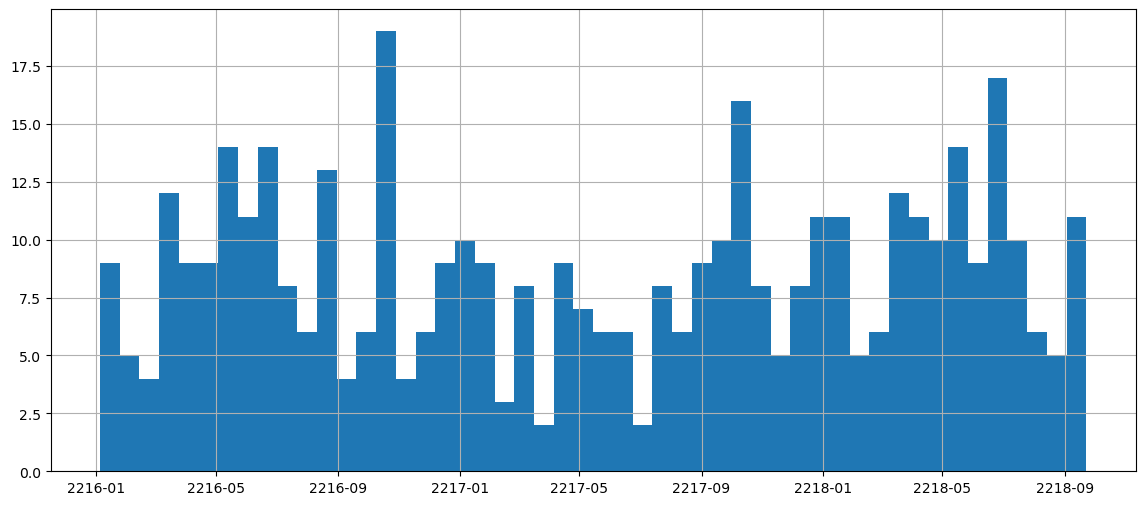

In [8]:
df[df['place'].isna()==True]['datetime'].hist(bins = 50, figsize=(14,6))

In [9]:
df = df.dropna().copy()

<Axes: >

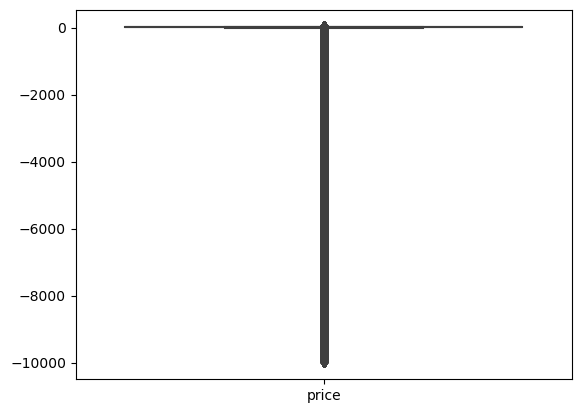

In [10]:
sns.boxplot(df[['price']])

<Axes: >

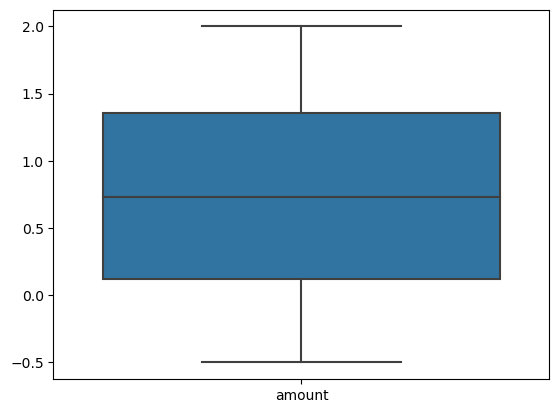

In [11]:
sns.boxplot(df[['amount']])

In [12]:
lower_bound = 0
upper_bound=100000
columns = ['price', 'amount']

In [13]:
for col in columns:

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)].copy()


<Axes: >

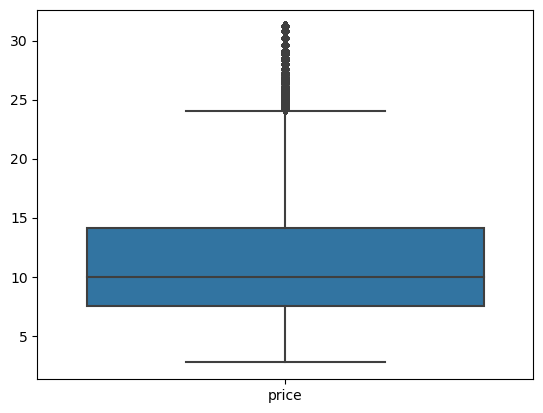

In [14]:
sns.boxplot(df[['price']])


<Axes: >

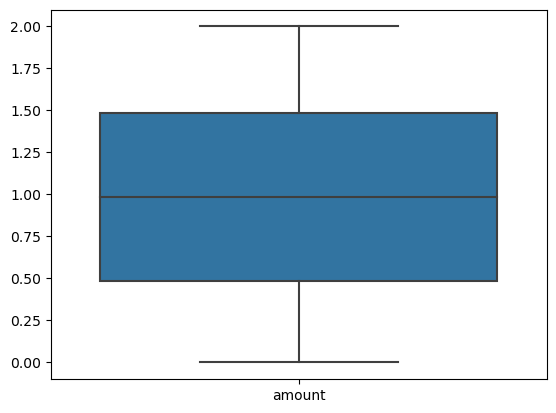

In [15]:
sns.boxplot(df[['amount']])

In [16]:
threshold = 3

In [17]:
for col in columns:

    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
    df = df[z_scores < threshold].copy()

In [18]:
df.describe()

,price,amount
count,651419.000000,651419.000000
mean,11.290954,0.987758
std,5.221139,0.576499
min,2.730000,0.000001
25%,7.470000,0.487797
50%,10.000000,0.982090
75%,14.020000,1.484385
max,27.590000,1.999999


<Axes: >

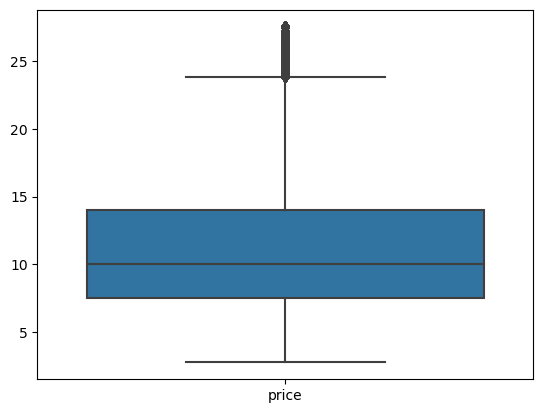

In [19]:
sns.boxplot(df[['price']])

<Axes: >

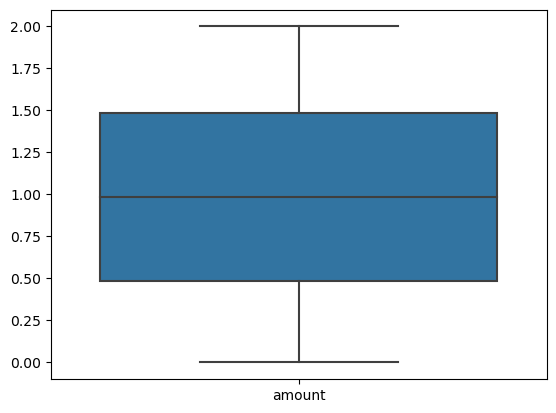

In [20]:
sns.boxplot(df[['amount']])

In [21]:
df.size

3257095

In [22]:
df[['price', 'amount']]

,price,amount
0,3.90,1.242125
2,3.90,0.882450
3,3.90,0.621377
4,3.90,1.367161
6,3.90,1.736619
...,...,...
875031,9.28,1.079104
875032,9.28,1.580617
875033,9.28,1.738492
875034,9.28,0.430340


<Axes: xlabel='datetime', ylabel='Density'>

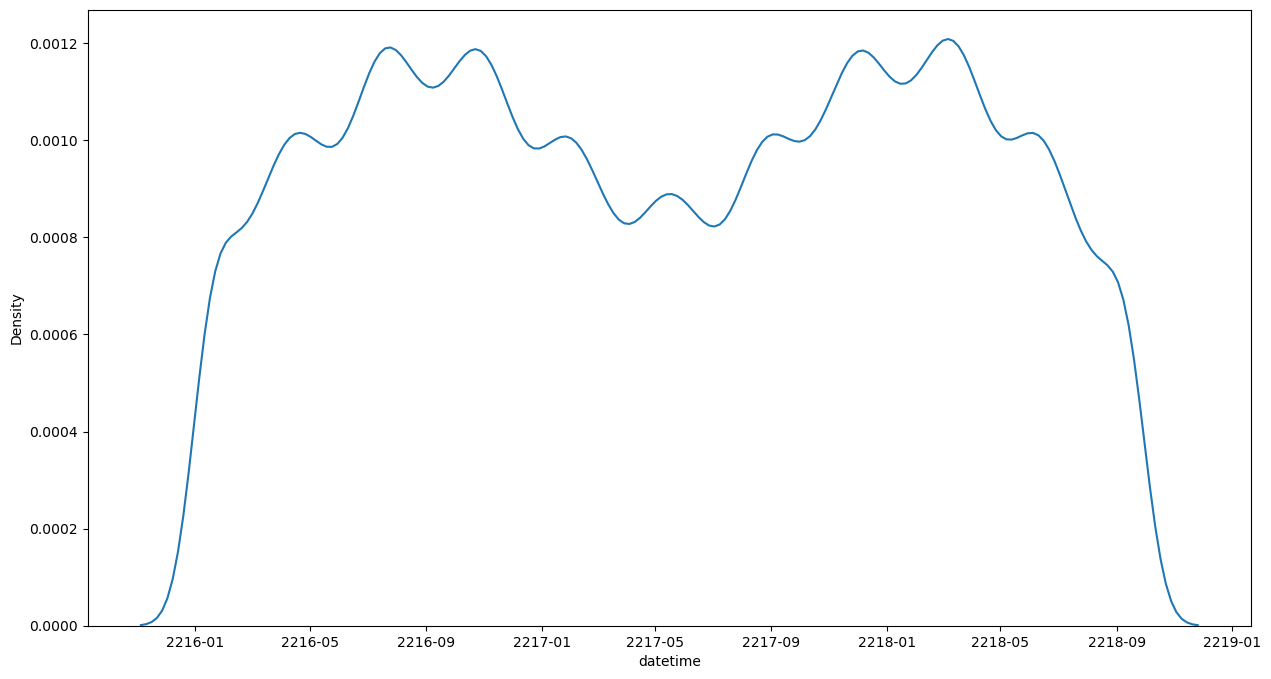

In [23]:
plt.figure(figsize=(15,8))
sns.kdeplot(df['datetime'])


In [24]:
result = df.groupby('place')[['datetime']].count() / len(df)


In [25]:
result

,datetime
place,
Анор Лондо,0.195978
Врата Балдура,0.162507
Кеджистан,0.205404
Нокрон,0.214406
Фалькония,0.221705


In [ ]:
# Создайте график
plt.figure(figsize=(10, 6))
plt.plot(df['datetime'], df['price'], marker='o', linestyle='-', color='b')

# Настройте оси и заголовок
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.title('График цен по датам')